In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import spherical_jn

In [6]:
import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')

import ipywidgets as widgets

from IPython.display import display, HTML

In [2]:
def dwba_prolate_spheroid(L, a, g, h, ka, phi):
    """
    DWBA solution for a fluid prolate spheroid.
    
    Parameters:
        L   : Length of spheroid (long axis)
        a   : Radius of spheroid (short axis)
        g   : rho2/rho1
        h   : c2/c1
        ka  : dimensionless wavenumber * radius (can be array)
        phi : incident angle in radians

    Returns:
        fbs      : complex backscattering amplitude
        sigmabs  : backscattering cross-section (abs squared)
        TS       : target strength in dB
    """

    Cb = 1 / (g * h**2) + 1 / g - 2  # gamma_kappa - gamma_rho

    beta = phi + np.pi / 2
    ka = np.atleast_1d(ka)  # ensure ka is array

    # Argument inside spherical Bessel function
    sin2 = np.sin(beta)**2
    cos2 = np.cos(beta)**2
    ellip_term = np.sqrt(sin2 + ((L / (2 * a))**2) * cos2)
    arg = 2 * ka / h * ellip_term

    j1 = spherical_jn(1, arg)

    fbs = (ka**2) * L * Cb / 2 * j1 / arg
    sigmabs = np.abs(fbs)**2
    TS = 10 * np.log10(sigmabs)

    return fbs, sigmabs, TS


In [3]:
a = 0.015
L = a * 6
g = 1.043
h = 1.053
c = 1500


freq = np.arange(1, 400e3)
ka = 2*np.pi*freq / c * a

phi = np.deg2rad(180)  # incident angle in radians (e.g., backscatter)

fbs, sigma, TS = dwba_prolate_spheroid(L, a, g, h, ka, phi)

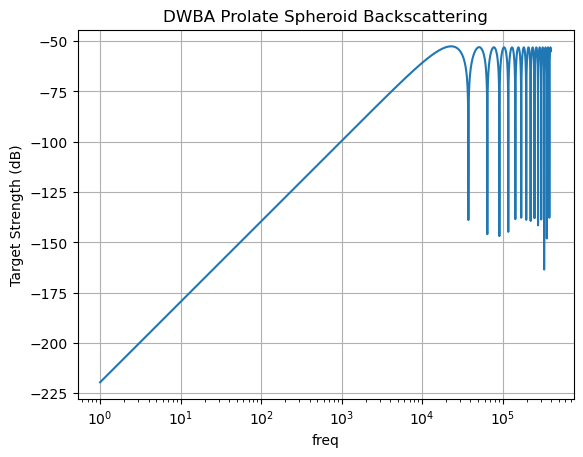

In [5]:
plt.plot(freq, TS)
plt.xlabel("freq")
plt.ylabel("Target Strength (dB)")
plt.title("DWBA Prolate Spheroid Backscattering")
plt.grid(True)
plt.xscale("log")
plt.show()

In [25]:
a = 0.015
L = a * 6
g = 1.043
h = 1.053
c = 1500

freq = np.arange(100, 100e3, 10)
ka = 2*np.pi*freq / c * a

def update_dwba(angle, xscale_type):

    phi = np.deg2rad(angle)  # incident angle in radians (e.g., backscatter)
    _, _, TS = dwba_prolate_spheroid(L, a, g, h, ka, phi)

    plt.figure(figsize=(5,3.5))
    plt.plot(freq/1e3, TS, lw=1)
    if xscale_type == "log":
        plt.xscale("log")
    plt.xlim(500/1e3, 100e3/1e3)
    plt.ylim(-120, -50)
    plt.xlabel("Frequency (kHz)")
    plt.ylabel("TS (dB)")
    plt.title("Scattering from a fluid prolate spheroid")
    plt.show


# rr = np.hstack(((np.arange(5, 10, 1)/100), np.arange(1, 10, 1)/10))
aa = np.arange(0, 91, 1)
angle_slider = widgets.SelectionSlider(
    options=aa,
    value=0,  # default value
    description="Incident angle (deg)",
    style={'description_width': 'initial'},
    continuous_update=True
)

xscale_radio = widgets.RadioButtons(
    options=["linear", "log"],
    value="linear",  # default selected
    description="X-axis type",
    disabled=False,
    style={'description_width': 'initial'}
)

interactive_plot = widgets.interactive(
    update_dwba, angle=angle_slider, xscale_type=xscale_radio)
display(interactive_plot)

interactive(children=(SelectionSlider(description='Incident angle (deg)', options=(np.int64(0), np.int64(1), n…